In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt


In [6]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
        )
        
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the output from conv layers
        x = self.fc_layers(x)
        return x
    

In [7]:
# Data transformations (you might need to adjust these based on your dataset)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load data
train_data = datasets.ImageFolder(root='data/train/', transform=transform)
valid_data = datasets.ImageFolder(root='data/valid/', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)

# Initialize model, loss function, and optimizer
model = CNNModel()
loss_fn = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss with logits
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [8]:
# Training settings
EPOCHS = 2
train_losses = []
valid_losses = []
best_valid_loss = float('inf')  # Initialize with infinity to ensure any loss is smaller
best_model_wts = None  # To store best model weights

print("Starting training...")

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0
    correct_train = 0  # To calculate training accuracy
    
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{EPOCHS}", unit="batch"):
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = loss_fn(outputs, labels.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
        # Calculate training accuracy
        preds = torch.round(outputs) 
        correct_train += (preds == labels.float()).sum().item()
    
    train_losses.append(train_loss/len(train_loader))
    train_acc = correct_train / len(train_loader.dataset)
    
    model.eval()
    valid_loss = 0.0
    correct_valid = 0  # To calculate validation accuracy
    
    with torch.no_grad():
        for inputs, labels in valid_loader:
            outputs = model(inputs).squeeze()
            loss = loss_fn(outputs, labels.float())
            valid_loss += loss.item()
            
            # Calculate validation accuracy
            preds = torch.round(outputs)
            correct_valid += (preds == labels.float()).sum().item()
    
    valid_losses.append(valid_loss/len(valid_loader))
    valid_acc = correct_valid / len(valid_loader.dataset)
    
    # Save the model if it has a lower validation loss than the best model seen so far
    if valid_losses[-1] < best_valid_loss:
        best_valid_loss = valid_losses[-1]
        best_model_wts = model.state_dict().copy()
    
    print(f"Epoch {epoch}/{EPOCHS} - Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_acc:.4f}, Valid Loss: {valid_losses[-1]:.4f}, Valid Acc: {valid_acc:.4f}")

# Load the best model weights
model.load_state_dict(best_model_wts)
print("Training completed.")



Starting training...


Epoch 1/2: 100%|██████████| 7/7 [00:12<00:00,  1.81s/batch]


Epoch 0/2 - Train Loss: 0.8121, Train Acc: 0.3502, Valid Loss: 0.6928, Valid Acc: 0.5000


Epoch 2/2: 100%|██████████| 7/7 [00:16<00:00,  2.31s/batch]


Epoch 1/2 - Train Loss: 0.6840, Train Acc: 0.5069, Valid Loss: 0.6478, Valid Acc: 0.5536
Training completed.


torch.Size([3, 224, 224])
tensor(0)
output: tensor([[0.1278]])
prediction: tensor([[0.]])
torch.Size([3, 224, 224])


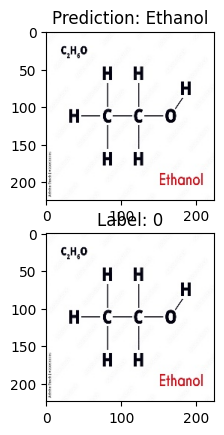

In [26]:

model.eval()
images_so_far = 0
fig, axs = plt.subplots(2,1)



with torch.no_grad():
    for i, (inputs, labels) in enumerate(valid_loader):
        for image,label in zip(inputs, labels):
            axs[0].imshow(image.permute(1,2,0))
            print(image.shape)
            print(label)
            ouput = model(image.unsqueeze(0))
            print(f"output: {ouput}")
            prediction = torch.round(ouput)
            print(f"prediction: {prediction}")
            prediction_label = 'Ethanol' if prediction == 0 else 'Water'
            axs[0].set_title(f"Prediction: {prediction_label}")

            axs[1].imshow(image.permute(1,2,0))
            axs[1].set_title(f"Label: {label}")
            
            
            
            print(image.shape)
            break
        break

            

